In [1]:
# Import libraries
'''
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
'''

# Pretty display for notebooks
'''
%matplotlib inline
'''

# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
submission_example = pd.read_csv("../asset/sampleSubmission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)
print("key  data : ", key.shape)
print("submission  data : ", submission_example.shape)

import pickle
import awesome_functions as cf

slack_url = pickle.load(open('slackUrl.pickle', 'rb'))
slack_url

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_weather = weather.copy()
df_key = key.copy()
df_test = test.copy()

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)
key  data :  (45, 2)
submission  data :  (526917, 2)


In [2]:
import pickle

In [3]:
train_preprocess = pickle.load(open("preprocess_date.pkl", "rb"))

In [4]:
train_preprocess.tail()

,date,store_nbr,item_nbr,units,log1p,date2,station_nbr,preciptotal_flag,depart_flag,weekday,is_weekend,is_holiday,is_holiday_weekday,is_holiday_weekend,day,month,year,holiday_name,around_BlackFriday
236033,2014-10-31,35,50,0,0.000000,2014-10-31,5,0.0,0.0,4,0,1,1,0,31,10,2014,Halloween,Else
236034,2014-10-31,35,63,0,0.000000,2014-10-31,5,0.0,0.0,4,0,1,1,0,31,10,2014,Halloween,Else
236035,2014-10-31,35,66,10,2.397895,2014-10-31,5,0.0,0.0,4,0,1,1,0,31,10,2014,Halloween,Else
236036,2014-10-31,35,93,0,0.000000,2014-10-31,5,0.0,0.0,4,0,1,1,0,31,10,2014,Halloween,Else
236037,2014-10-31,35,105,0,0.000000,2014-10-31,5,0.0,0.0,4,0,1,1,0,31,10,2014,Halloween,Else


In [5]:
train_preprocess.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'log1p', 'date2',
       'station_nbr', 'preciptotal_flag', 'depart_flag', 'weekday',
       'is_weekend', 'is_holiday', 'is_holiday_weekday', 'is_holiday_weekend',
       'day', 'month', 'year', 'holiday_name', 'around_BlackFriday'],
      dtype='object')

In [4]:
weather_refined = pd.read_csv("weather+holyday_201807041434.csv")

In [7]:
weather_refined.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,weekday,holiday
19660,20,2014-10-27,85,66,75,6,59,65,0,10,...,29.11,29.82,10.0,18.0,10.4,2014,10,27,0,regular day
19661,20,2014-10-28,80,68,74,5,60,65,0,9,...,29.30,29.97,3.1,36.0,6.4,2014,10,28,1,regular day
19662,20,2014-10-29,78,55,66,-2,47,56,0,1,...,29.42,30.12,4.9,6.0,6.1,2014,10,29,2,regular day
19663,20,2014-10-30,80,52,66,-2,50,57,0,1,...,29.40,30.11,1.6,14.0,4.9,2014,10,30,3,regular day
19664,20,2014-10-31,68,50,59,-9,39,50,6,0,...,29.57,30.27,10.5,36.0,11.2,2014,10,31,4,holiday


In [5]:
weather_refined_drop = weather_refined.drop(["year","month","day","weekday","holiday","sunrise","sunset","snowfall","sealevel","codesum"], axis=1)
weather_refined_drop.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,resultspeed,resultdir,avgspeed
19660,20,2014-10-27,85,66,75,6,59,65,0,10,0.0,29.11,10.0,18.0,10.4
19661,20,2014-10-28,80,68,74,5,60,65,0,9,0.0,29.30,3.1,36.0,6.4
19662,20,2014-10-29,78,55,66,-2,47,56,0,1,0.0,29.42,4.9,6.0,6.1
19663,20,2014-10-30,80,52,66,-2,50,57,0,1,0.0,29.40,1.6,14.0,4.9
19664,20,2014-10-31,68,50,59,-9,39,50,6,0,0.0,29.57,10.5,36.0,11.2


In [6]:
total = train_preprocess.merge(weather_refined_drop, on=["date", "station_nbr"], how='inner')
total.tail()

,date,store_nbr,item_nbr,units,log1p,date2,station_nbr,preciptotal_flag,depart_flag,weekday,...,depart,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,resultspeed,resultdir,avgspeed
229225,2014-10-30,39,111,3,1.386294,2014-10-30,8,0.0,0.0,3,...,-1,60,63,0,5,0.0,29.74,0.30,11.0,0.2
229226,2014-10-31,39,9,12,2.564949,2014-10-31,8,0.0,0.0,4,...,-5,38,65,0,1,0.0,29.82,11.55,20.5,5.1
229227,2014-10-31,39,36,3,1.386294,2014-10-31,8,0.0,0.0,4,...,-5,38,65,0,1,0.0,29.82,11.55,20.5,5.1
229228,2014-10-31,39,103,4,1.609438,2014-10-31,8,0.0,0.0,4,...,-5,38,65,0,1,0.0,29.82,11.55,20.5,5.1
229229,2014-10-31,39,111,2,1.098612,2014-10-31,8,0.0,0.0,4,...,-5,38,65,0,1,0.0,29.82,11.55,20.5,5.1


In [17]:
df_weather_pivot = df_weather.copy()

In [18]:
def to_nan(a):
    temp = str(a).strip()
    if temp == 'M' or temp == '-':
        return np.nan
    elif temp == "T":
        return 0
    else:
        return float(a)

In [19]:
weather_columns = ['tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset','snowfall', 'preciptotal',
 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']

In [20]:
for column in weather_columns:
    df_weather_pivot[column] = df_weather_pivot[column].apply(to_nan)

In [21]:
df_weather_pivot_count = df_weather_pivot.copy()

In [22]:
def nan_to_zero(a):
    if np.isnan(a):
        return 0
    else:
        return 1

In [23]:
for column in weather_columns:
    df_weather_pivot_count[column] = df_weather_pivot_count[column].apply(nan_to_zero)

In [24]:
df_weather_pivot_A = df_weather_pivot.merge(df_key, on=["station_nbr"], how='inner')
df_weather_pivot_A.tail()
# inner와 outer는 on으로 잡아주는 column 기준으로 합집합이냐 교집합이냐

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,store_nbr
46387,5,2014-10-27,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN,...,1645.0,,NaN,NaN,NaN,29.91,13.4,28.0,NaN,35
46388,5,2014-10-28,NaN,NaN,NaN,NaN,47.0,NaN,NaN,NaN,...,1644.0,,NaN,NaN,NaN,30.03,7.0,19.0,NaN,35
46389,5,2014-10-29,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN,...,1643.0,,NaN,NaN,NaN,29.87,8.2,23.0,NaN,35
46390,5,2014-10-30,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN,...,1641.0,,NaN,NaN,NaN,29.95,8.3,30.0,NaN,35
46391,5,2014-10-31,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,...,1640.0,,NaN,NaN,NaN,30.01,10.8,5.0,NaN,35


In [25]:
for column in weather_columns:
    df_weather_pivot_A[column] = df_weather_pivot_A[column].apply(to_nan)

In [26]:
for column in weather_columns:
    df_weather_pivot_A[column] = df_weather_pivot_A[column].apply(nan_to_zero)

In [27]:
df_weather_pivot_A.pivot_table(weather_columns, ["station_nbr", "store_nbr"], aggfunc=np.sum) #, "store_nbr"

avgspeed  cool  depart  dewpoint  heat  preciptotal  \
station_nbr store_nbr                                                        
1           1              1032  1029       0      1029  1029         1030   
2           16             1031  1023     992      1029  1023         1034   
3           21             1033  1028     997      1035  1028         1033   
            29             1033  1028     997      1035  1028         1033   
            33             1033  1028     997      1035  1028         1033   
4           8              1033  1025     994      1027  1025         1033   
5           35               30    30      30       406    30           30   
6           7              1033  1029     998      1035  1029         1033   
            13             1033  1029     998      1035  1029         1033   
7           3              1032   994       0       998   994         1034   
            20             1032   994       0       998   994         1034   
            28             1032   994       0       998   994         1034   
8           39             1030   567       0       985   567         1030   
9           4              1030  1016       0      1019  1016         1030   
            24             1030  1016       0      1019  1016         1030   
10          11             1034  1027       0      1035  1027         1034   
            22             1034  1027       0      1035  1027         1034   
            27             1034  1027       0      1035  1027         1034   
11          12             1032  1031    1000       975  1031         1034   
            43             1032  1031    1000       975  1031         1034   
12          5              1033  1031       0      1034  1031         1034   
            10             1033  1031       0      1034  1031         1034   
            41             1033  1031       0      1034  1031         1034   
            44             1033  1031       0      1034  1031         1034   
13          15             1034  1021       0      1035  1021         1034   
            25             1034  1021       0      1035  1021         1034   
            32             1034  1021       0      1035  1021         1034   
            37             1034  1021       0      1035  1021         1034   
            40             1034  1021       0      1035  1021         1034   
14          2              1033  1029     998      1032  1029         1033   
            6              1033  1029     998      1032  1029         1033   
            38             1033  1029     998      1032  1029         1033   
            42             1033  1029     998      1032  1029         1033   
15          19             1032  1030     999      1028  1030         1034   
16          14             1027  1022       0      1027  1022         1033   
            45             1027  1022       0      1027  1022         1033   
17          9              1034  1030       0      1034  1030         1034   
            18             1034  1030       0      1034  1030         1034   
            23             1034  1030       0      1034  1030         1034   
            26             1034  1030       0      1034  1030         1034   
            31             1034  1030       0      1034  1030         1034   
            34             1034  1030       0      1034  1030         1034   
18          36             1033  1031    1001      1035  1031         1033   
19          30             1033  1027     997      1024  1027         1033   
20          17             1033  1028       0      1029  1028         1034   

                       resultdir  resultspeed  sealevel  snowfall  \
station_nbr store_nbr                                               
1           1               1031         1031      1027         0   
2           16              1030         1030      1024      1024   
3           21              1035         1035      1032      1031   
           

In [32]:
df_train_pivot = df_train.pivot_table(["units"],["store_nbr"],["item_nbr"],aggfunc=np.sum)
# 다룰 데이터, 로우에 배치할 데이터, 열값으로 가져갈 카테고리 데이터

In [33]:
valid_station_count = []
for i in range(1,112):
    valid_station_count.append(len(df_train_pivot[df_train_pivot['units'][i] != 0]))

In [34]:
df_train_pivot.loc[0] = valid_station_count
df_train_pivot = df_train_pivot.sort_index()
df_train_pivot

units                                                        ...   \
item_nbr    1     2    3    4      5      6    7      8       9    10  ...    
store_nbr                                                              ...    
0             1     3    1    1     18      1    1      1      17    1 ...    
1             0     0    0    0      0      0    0      0   27396    0 ...    
2             0     0    0    0  55104      0    0      0       0    0 ...    
3             0  1083    0    0  56663      0    0      0       0    0 ...    
4             0     0    0    0      0      0    0      0  117123    0 ...    
5             0     0    0    0      0      0    0      0       0    0 ...    
6             0     0    0    0      0      0    0      0   50431    0 ...    
7             0     0    0    0  62230      0  721      0       0    0 ...    
8             0     0    0    0  32647      0    0      0       0    0 ...    
9             0     0    0    0  45024      0    0      0       0  745 ...    
10            0     0    0    0  61866      0    0      0       0    0 ...    
11            0     0    0    0      0      0    0      0   34103    0 ...    
12            0     0    0    0      0      0    0      0       0    0 ...    
13            0     0    0    0  67241      0    0      0       0    0 ...    
14            0     0    0    0      0      0    0      0   12164    0 ...    
15            0     0    0    0  64522      0    0      0       0    0 ...    
16            0     0    0    0      0      0    0      0       0    0 ...    
17            0     0    0    0      0      0    0      0  135367    0 ...    
18            0     0    0    0  16565      0    0      0       0    0 ...    
19            0     0    0    0      0      0    0      0       0    0 ...    
20            0     0    0    0  71034      0    0      0       0    0 ...    
21            0     0    0    0  41641      0    0      0       0    0 ...    
22            0     0    0    0      0      0    0      0   42880    0 ...    
23            0     0    0    0  28810      0    0      0       0    0 ...    
24            0     0    0    0      0  41398    0      0       0    0 ...    
25            0     0    0    0      0      0    0      0   98560    0 ...    
26            0  1482    0    0  43448      0    0      0       0    0 ...    
27            0     0    0    0      0      0    0      0   31652    0 ...    
28            0   704    0    0  33338      0    0      0       0    0 ...    
29            0     0    0    0      0      0    0  30345       0    0 ...    
30            0     0    0    0      0      0    0      0       0    0 ...    
31            0     0    0    0      0      0    0      0   48233    0 ...    
32            0     0    0    0      0      0    0      0   41888    0 ...    
33            0     0    0    0      0      0    0      0  101586    0 ...    
34            0     0    0    0      0      0    0      0   51789    0 ...    
35            0     0    0    0      0      0    0      0       0    0 ...    
36          778     0    0    0      0      0    0      0   35874    0 ...    
37            0     0    0    0  50063      0    0      0       0    0 ...    
38            0     0    0    0      0      0    0      0   66679    0 ...    
39            0     0    0    0      0      0    0      0    5057    0 ...    
40            0     0    0    0  48454      0    0      0       0    0 ...    
41            0     0    0    0      0      0    0      0       0    0 ...    
42            0     0    0    0  35178      0    0      0       0    0 ...    
43            0     0  675    0      0      0    0      0       0    0 ...    
44            0     0    0    0  32834      0    0      0       0    0 ...    
45            0     0    0  348      0      0    0      0   15833    0 ...    

                                                              
item_nbr  102  103  104  105 106  107   108   109   110  111  
store_nbr   

In [7]:
total_item_1 = total[total["item_nbr"] == 1]

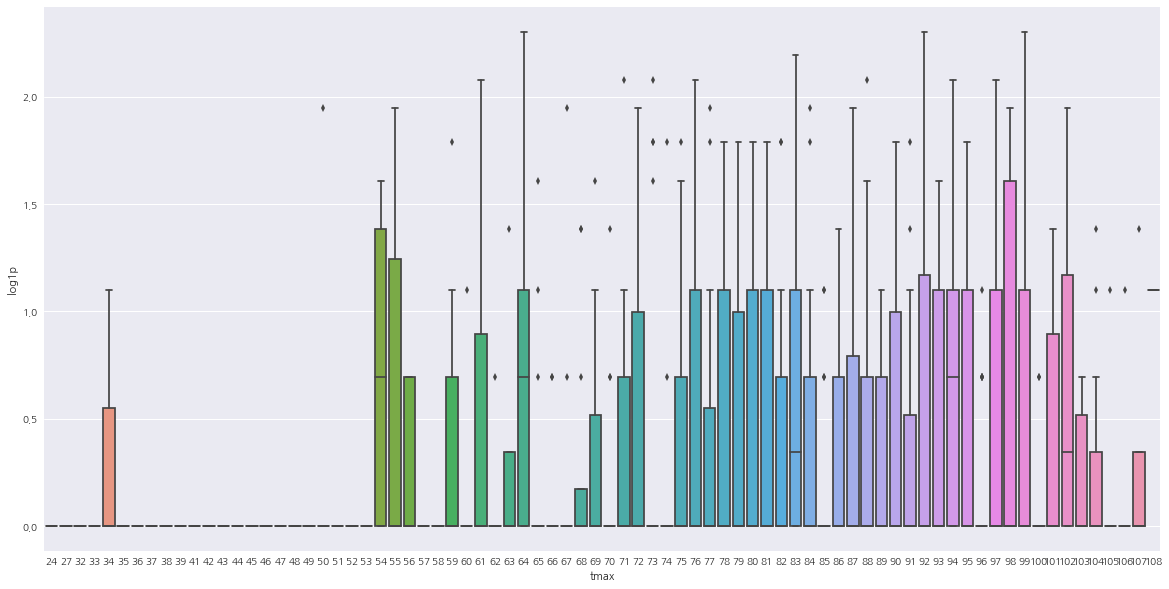

In [12]:
total_item_1
plt.figure(figsize=(20, 10))
sns.boxplot(x=total_item_1["tmax"], y=total_item_1["log1p"])
plt.show()

In [15]:
total_item_2 = total[total["item_nbr"] == 2]

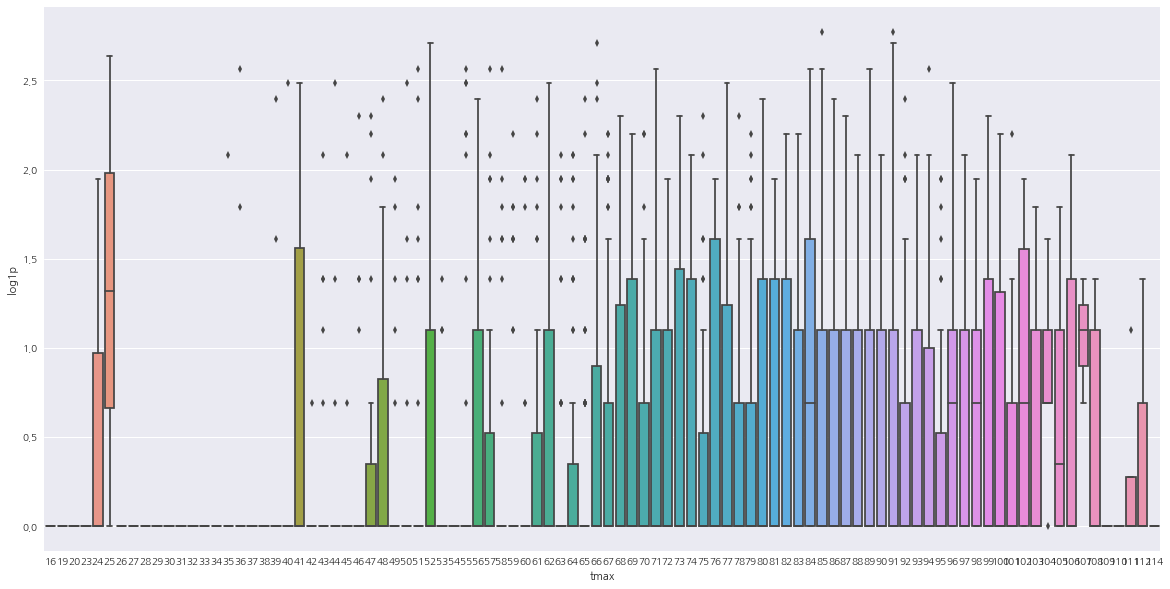

In [16]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=total_item_2["tmax"], y=total_item_2["log1p"])
plt.show()

In [35]:
total.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'log1p', 'date2',
       'station_nbr', 'preciptotal_flag', 'depart_flag', 'weekday',
       'is_weekend', 'is_holiday', 'is_holiday_weekday', 'is_holiday_weekend',
       'day', 'month', 'year', 'holiday_name', 'around_BlackFriday', 'tmax',
       'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'preciptotal', 'stnpressure', 'resultspeed', 'resultdir', 'avgspeed'],
      dtype='object')

In [61]:
df_train_pivot = df_train.pivot_table(["log1p"],["store_nbr"],["item_nbr"],aggfunc=np.sum)
# 다룰 데이터, 로우에 배치할 데이터, 열값으로 가져갈 카테고리 데이터

In [73]:
total_item_9 = total[total["item_nbr"] == 9]

In [125]:
total_item_3 = total[total["item_nbr"] == 3]

In [135]:
total_1 = total[total['units']!=0][["item_nbr", "month"]]
total_2 = total_1.groupby('item_nbr')
total_2

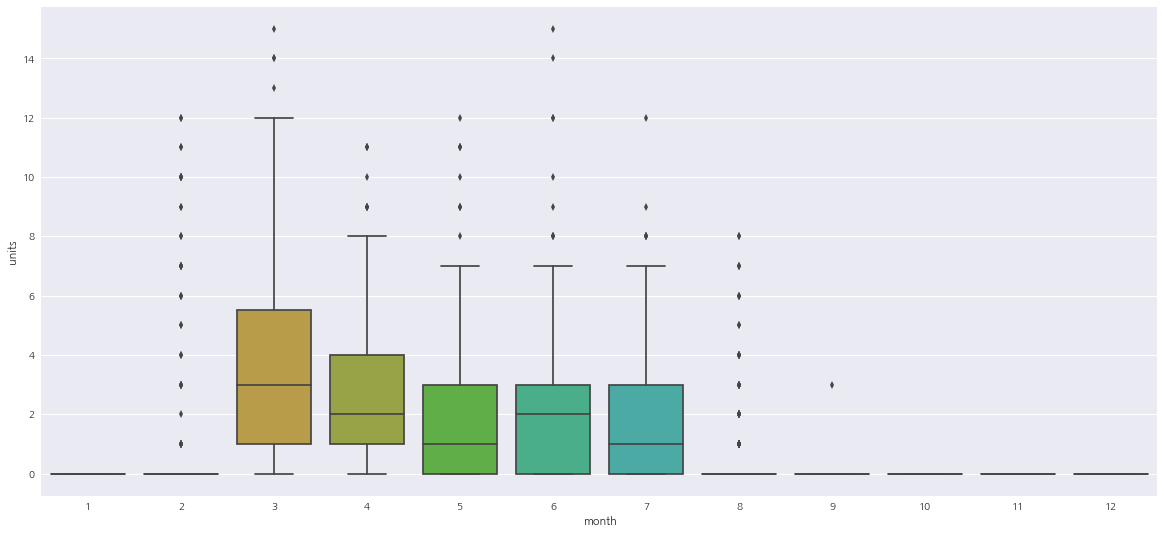

In [128]:
plt.figure(figsize=(20,9))
sns.boxplot(x="month", y="units", data=total_item_2[["month", "units"]])

In [88]:
flights_passengers

preciptotal                                                    \
units            0      1      2      3      4       5      6      7     
item_nbr                                                                 
9             19.715  14.53  18.59  16.24  18.41  14.095  13.16  13.01   

                       ...                                                   \
units        8     9   ...   380  383  390   399   413  421  430  460   476   
item_nbr               ...                                                    
9         13.325  9.31 ...   0.0  0.0  0.0  0.35  0.09  0.0  0.0  0.0  0.12   

               
units     503  
item_nbr       
9         0.0  

[1 rows x 335 columns]

In [97]:
flights_passengers

,log1p
month,
1,5742.673568
2,5143.662533
3,5471.771976
4,4977.249660
5,4701.796851
6,4489.815108
7,4546.505291
8,5214.686913
9,4767.100144


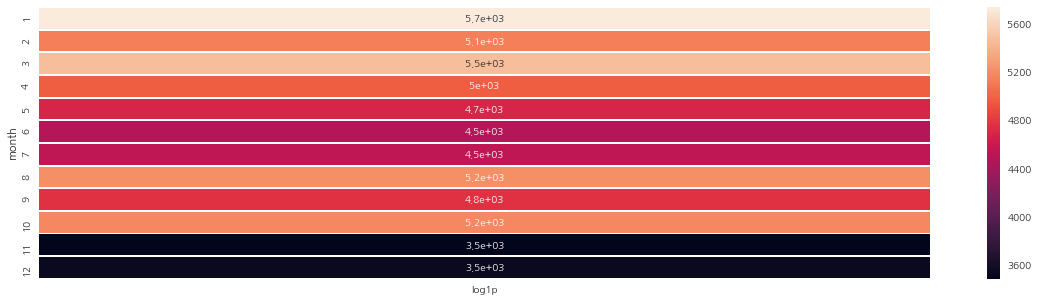

In [96]:
flights_passengers = total_item_9.pivot_table(["log1p"], ["month"],aggfunc=np.sum)
plt.figure(figsize=(20,5))
sns.heatmap(flights_passengers, annot=True, linewidths=1)
plt.show()
# flights_passengers

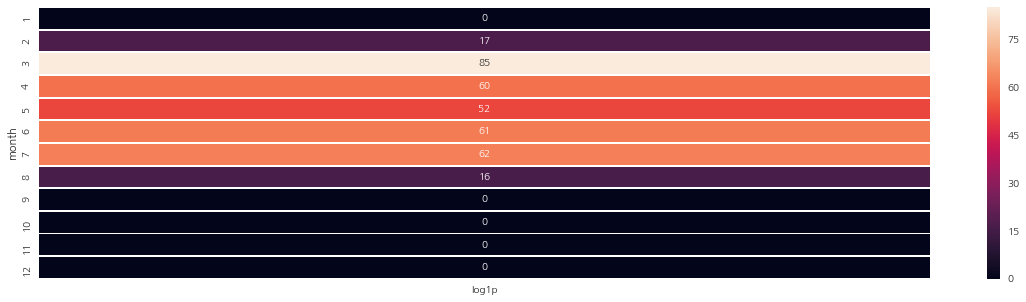

In [99]:
flights_passengers = total_item_1.pivot_table(["log1p"], ["month"],aggfunc=np.sum)
plt.figure(figsize=(20,5))
sns.heatmap(flights_passengers, annot=True, linewidths=1)
plt.show()
# flights_passengers

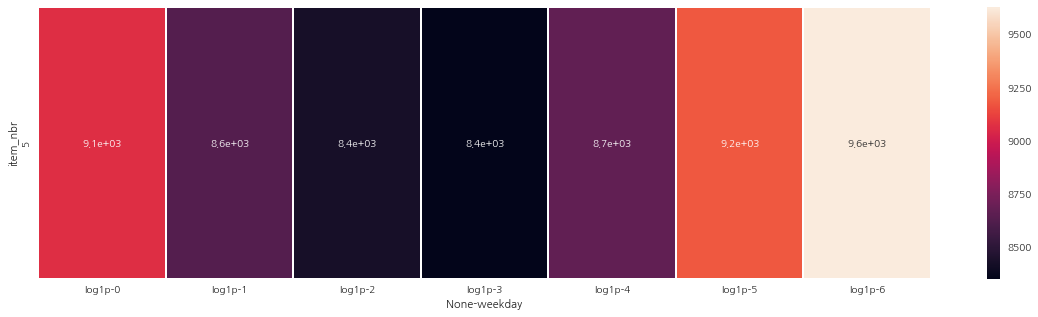

In [75]:
flights_passengers = total_item_5.pivot_table(["log1p"], ["item_nbr"], ["weekday"],aggfunc=np.sum)
plt.figure(figsize=(20,5))
sns.heatmap(flights_passengers, annot=True, linewidths=1)
plt.show()
# flights_passengers

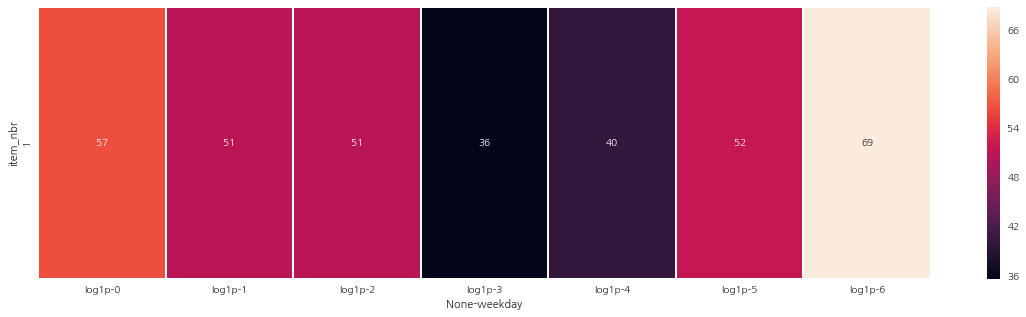

In [76]:
flights_passengers = total_item_1.pivot_table(["log1p"], ["item_nbr"], ["weekday"],aggfunc=np.sum)
plt.figure(figsize=(20,5))
sns.heatmap(flights_passengers, annot=True, linewidths=1)
plt.show()
# flights_passengers

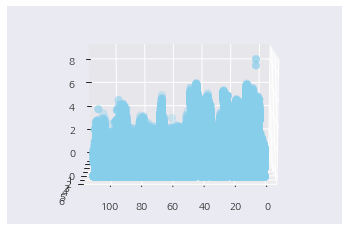

In [113]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Dataset
# df=pd.DataFrame({'X': range(1,101), 'Y': np.random.randn(100)*15+range(1,101), 'Z': (np.random.randn(100)*15+range(1,101))*2 })
 
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(total['item_nbr'], total['weekday'], total['log1p'], c='skyblue', s=60)
ax.view_init(10, 90)
plt.show()

In [10]:
total.isna().sum()

date                  0
store_nbr             0
item_nbr              0
units                 0
log1p                 0
date2                 0
station_nbr           0
preciptotal_flag      0
depart_flag           0
weekday               0
is_weekend            0
is_holiday            0
is_holiday_weekday    0
is_holiday_weekend    0
day                   0
month                 0
year                  0
holiday_name          0
around_BlackFriday    0
tmax                  0
tmin                  0
tavg                  0
depart                0
dewpoint              0
wetbulb               0
heat                  0
cool                  0
preciptotal           0
stnpressure           0
resultspeed           0
resultdir             0
avgspeed              0
dtype: int64

In [11]:
cf.isThereNoneData(total)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,date,229230,0,0.0,0,0.0,0,0.0
1,store_nbr,229230,0,0.0,0,0.0,0,0.0
2,item_nbr,229230,0,0.0,0,0.0,0,0.0
3,units,229230,0,0.0,0,0.0,0,0.0
4,log1p,229230,0,0.0,0,0.0,0,0.0
5,date2,229230,0,0.0,0,0.0,0,0.0
6,station_nbr,229230,0,0.0,0,0.0,0,0.0
7,preciptotal_flag,229230,0,0.0,0,0.0,0,0.0
8,depart_flag,229230,0,0.0,0,0.0,0,0.0
9,weekday,229230,0,0.0,0,0.0,0,0.0


In [8]:
total_1 = total[["tmax","depart","dewpoint","heat","cool","preciptotal","resultspeed","resultdir","avgspeed"]]
# "tavg","wetbulb","stnpressure","tmin",

In [13]:
total_1.tail()

,tmax,depart,dewpoint,heat,cool,preciptotal,resultspeed,resultdir,avgspeed
229225,82,-1,60,0,5,0.0,0.30,11.0,0.2
229226,78,-5,38,0,1,0.0,11.55,20.5,5.1
229227,78,-5,38,0,1,0.0,11.55,20.5,5.1
229228,78,-5,38,0,1,0.0,11.55,20.5,5.1
229229,78,-5,38,0,1,0.0,11.55,20.5,5.1


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(total_1.values, i) for i in range(total_1.shape[1])]
vif["features"] = total_1.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.173508,preciptotal
1,1.319404,depart
2,2.719923,heat
3,2.802299,cool
4,4.976898,resultdir
5,18.396782,resultspeed
6,29.704886,dewpoint
7,29.798810,avgspeed
8,39.621834,tmax


In [9]:
import statsmodels.api as sm

In [17]:
model_date_scale = sm.OLS.from_formula("log1p ~ C(item_nbr):scale(preciptotal) + C(item_nbr):scale(depart) + C(item_nbr):scale(heat) + C(item_nbr):scale(cool) + C(item_nbr):C(is_weekend)", data=total)

In [18]:
print(model_date_scale.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  log1p   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     2142.
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:03:06   Log-Likelihood:            -2.3172e+05
No. Observations:              229230   AIC:                         4.647e+05
Df Residuals:                  228582   BIC:                         4.714e+05
Df Model:                         647                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [ ]:
# from sklearn import linear_model
# >>> reg = linear_model.Lasso(alpha = 0.1)
# >>> reg.fit([[0, 0], [1, 1]], [0, 1])
# Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
#   normalize=False, positive=False, precompute=False, random_state=None,
#   selection='cyclic', tol=0.0001, warm_start=False)
# >>> reg.predict([[1, 1]])
# array([ 0.8])

In [7]:
from patsy import dmatrix
# data_transformed = dmatrix(formula, data)

In [14]:
# matrix_df = pd.DataFrame(dmatrix("C(item_nbr):scale(preciptotal) + C(item_nbr):C(is_weekend)", data=total))

In [10]:
# matrix_df = pd.DataFrame(dmatrix("C(item_nbr):scale(preciptotal) + C(item_nbr):C(store_nbr) + C(item_nbr):C(is_weekend)", data=total))

In [11]:
# matrix_df = pd.DataFrame(dmatrix("C(item_nbr):scale(preciptotal) + C(item_nbr):scale(depart) + C(item_nbr):C(is_weekend)", data=total))

In [8]:
# matrix_df = pd.DataFrame(dmatrix("C(item_nbr):scale(preciptotal) + C(item_nbr):scale(depart) + C(item_nbr):C(is_weekend) + C(item_nbr):C(is_holiday)", data=total))

In [19]:
# matrix_df = pd.DataFrame(dmatrix("C(item_nbr):scale(preciptotal) + C(item_nbr):scale(depart) + C(item_nbr):C(is_weekend) + C(item_nbr):C(around_BlackFriday)", data=total))

In [8]:
matrix_df = pd.DataFrame(dmatrix("C(item_nbr):C(store_nbr)", data=total))

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
y = total["log1p"]
X = matrix_df
model = LinearRegression(fit_intercept=True)
model = model.fit(X, y)
# y_new = model.predict(x_new)

MemoryError: 

In [21]:
model.score(X,y)

0.8557817195629814

In [9]:
from sklearn import linear_model

In [22]:
y = total["log1p"]
X = matrix_df
model = linear_model.Lasso(alpha = 0.01)
model = model.fit(X, y)
# y_new = model.predict(x_new)

In [23]:
model.score(X,y)

0.7503567584638718

In [12]:
# from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [13]:
cv = KFold(10)

In [24]:
cross_val_score(model, X, y, scoring="r2", cv=cv)

array([0.84006041, 0.56108653, 0.71271736, 0.49624164, 0.81066614,
       0.79994471, 0.68072514, 0.8474632 , 0.45862358, 0.61123768])

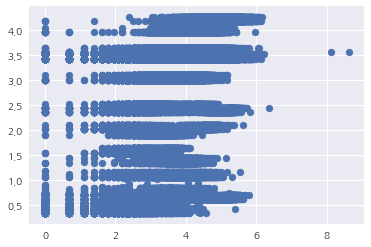

In [25]:
predictions = model.predict(X)

plt.scatter(y, predictions)
# plt.xlabel(u"실제 집값")
# plt.ylabel(u"집값 예측치")
plt.show()